In [1]:

from sklearn.datasets import load_files
import numpy as np

train_dir = '../input/fruits/Fruits_1/Training'
test_dir = '../input/fruits/Fruits_1/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  21168
Testing set size :  7115


In [2]:

no_of_classes = len(np.unique(y_train))
no_of_classes

41

In [3]:
print(y_train[0:10])


[14 17 37 31 11 22 38  3  5 18]


In [4]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

Using TensorFlow backend.


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [5]:
x_test,x_valid = x_test[3500:],x_test[:3500]
y_test,y_vaild = y_test[3500:],y_test[:3500]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (3500,)
Vaildation y : (3500, 41)
Test X :  (3615,)
Test y :  (3615, 41)


In [6]:
x_train[0]

'../input/fruits/Fruits_1/Training/Banana Lady Finger/r_4_100.jpg'

In [7]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (21168, 100, 100, 3)
Validation set shape :  (3500, 100, 100, 3)
Test set shape :  (3615, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [8]:
from keras.applications.resnet_v2 import ResNet50V2
model=ResNet50V2(include_top=True, weights=None, input_tensor=None, input_shape=(100,100,3),classes=41)
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 52, 52, 64)   0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
batch_size = 50

checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5',  save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 50,
        epochs=15,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
                    shuffle=True
        )

Train on 21168 samples, validate on 3500 samples
Epoch 1/15
21168/21168 [==============================] - 91s 4ms/step - loss: 0.2578 - accuracy: 0.9229 - val_loss: 20.9393 - val_accuracy: 0.0651
Epoch 2/15
21168/21168 [==============================] - 66s 3ms/step - loss: 0.0493 - accuracy: 0.9854 - val_loss: 29.5408 - val_accuracy: 0.0574
Epoch 3/15
21168/21168 [==============================] - 66s 3ms/step - loss: 0.0290 - accuracy: 0.9920 - val_loss: 0.1708 - val_accuracy: 0.9677
Epoch 4/15
21168/21168 [==============================] - 66s 3ms/step - loss: 0.0517 - accuracy: 0.9866 - val_loss: 67.6398 - val_accuracy: 0.0220
Epoch 5/15
21168/21168 [==============================] - 66s 3ms/step - loss: 0.0160 - accuracy: 0.9958 - val_loss: 0.1359 - val_accuracy: 0.9637
Epoch 6/15
21168/21168 [==============================] - 66s 3ms/step - loss: 0.0269 - accuracy: 0.9926 - val_loss: 0.7970 - val_accuracy: 0.8354
Epoch 7/15
21168/21168 [==============================] - 66s 3ms/

In [11]:
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [12]:

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9917012453079224


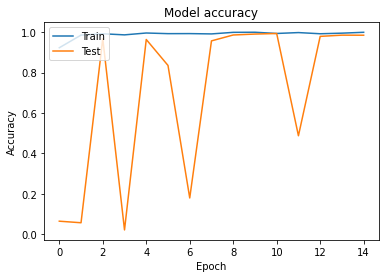

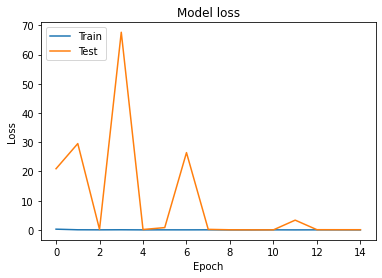

In [13]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()